In [1]:
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data/071921 Petri 2nd Repeat.csv")

In [3]:
data = data.transpose()

In [4]:
data = data.unstack().reset_index()

In [5]:
data = data.drop(columns = 'level_0')

In [6]:
data = data.dropna()

In [7]:
#data = data.reset_index()

In [8]:
data[['genotype', 'split']] = data['level_1'].str.split('_', 1, expand=True)
data[['condition', 'perlite_size']] = data['split'].str.split('-', 1, expand=True)
data = data.drop(columns='split')

In [9]:
data = data.drop(columns='level_1')

In [10]:
data.groupby("condition")[0].describe()

,count,mean,std,min,25%,50%,75%,max
condition,,,,,,,,
1,49.0,24.961224,15.973909,2.5,11.60,23.50,36.60,68.2
2,51.0,26.349020,15.029190,3.6,14.95,23.90,34.90,72.3
3,32.0,25.653125,23.158792,2.9,8.20,18.15,35.05,91.1


In [11]:
data = data.rename(columns={0: "weight(mg)", "condition": "iron_condition"})

In [12]:
data[data['genotype'] == 'Col0']

,weight(mg),genotype,iron_condition,perlite_size
0,5.0,Col0,1,L
1,12.2,Col0,1,S
2,32.3,Col0,2,L
3,46.0,Col0,2,S
4,29.4,Col0,3,L
5,91.1,Col0,3,S
24,5.7,Col0,1,L
25,36.6,Col0,1,S
26,22.6,Col0,2,L
27,11.9,Col0,2,S


In [13]:
import seaborn as sns
from statannot import add_stat_annotation
sns.set_theme(style="whitegrid")

NameError: name 'i' is not defined

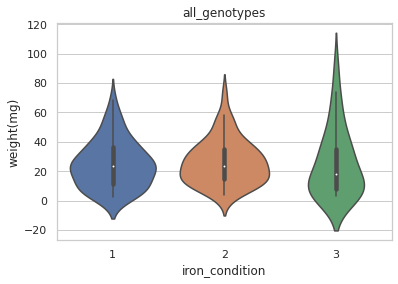

In [14]:
plt.figure()
ax = sns.violinplot(x="iron_condition", y="weight(mg)", data=data,
                   scale='count')
ax.set_title('all_genotypes')
order = ['1','2','3']
x = 'iron_condition'
y = 'weight(mg)'
add_stat_annotation(ax, data=data[data['genotype'] == i], x=x, y=y, order=order,
                box_pairs=[('1','2'), ('1','3'), ('2','3')],
                test='t-test_ind', text_format='star', loc='outside', verbose=2)
plt.savefig("perlite_iron_condition_weights_all_sig" + '.png')
plt.show()

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1 v.s. 2: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=3.918e-02
2 v.s. 3: t-test independent samples with Bonferroni correction, P_val=1.790e-01 stat=-2.049e+00
1 v.s. 3: t-test independent samples with Bonferroni correction, P_val=5.969e-01 stat=-1.376e+00


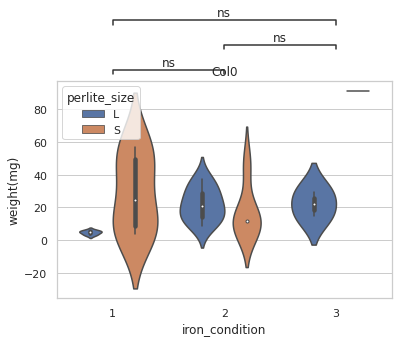

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1 v.s. 2: t-test independent samples with Bonferroni correction, P_val=6.454e-01 stat=1.273e+00
2 v.s. 3: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=7.648e-02
1 v.s. 3: t-test independent samples with Bonferroni correction, P_val=8.068e-01 stat=1.139e+00


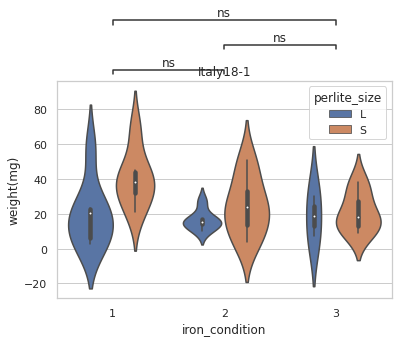

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1 v.s. 2: t-test independent samples with Bonferroni correction, P_val=1.921e-01 stat=-1.934e+00
2 v.s. 3: t-test independent samples with Bonferroni correction, P_val=4.000e-01 stat=1.554e+00
1 v.s. 3: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=3.043e-01


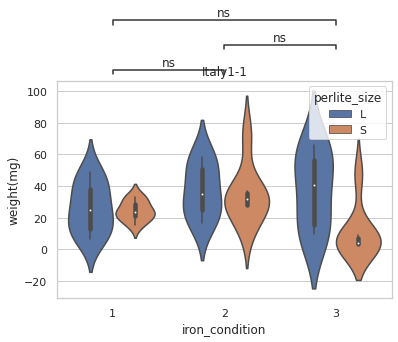

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1 v.s. 2: t-test independent samples with Bonferroni correction, P_val=8.029e-01 stat=-1.137e+00
2 v.s. 3: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=1.362e-01
1 v.s. 3: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-5.587e-01


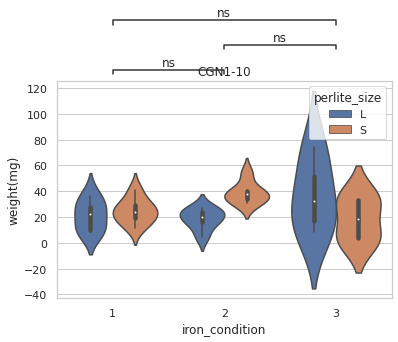

In [15]:
for i in data['genotype'].unique():
    plt.figure()
    ax = sns.violinplot(x="iron_condition", y="weight(mg)", hue='perlite_size', data=data[data['genotype'] == i],
                       scale='count')
    ax.set_title(i)
    order = ['1','2','3']
    x = 'iron_condition'
    y = 'weight(mg)'
    add_stat_annotation(ax, data=data[data['genotype'] == i], x=x, y=y, order=order,
                    box_pairs=[('1','2'), ('1','3'), ('2','3')],
                    test='t-test_ind', text_format='star', loc='outside', verbose=2)
    plt.savefig("perlite_iron_condition_weights" + str(i) + '.png')
    plt.show()

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Col0 v.s. Italy18-1: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-9.603e-01
Italy18-1 v.s. CGN1-10: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=9.310e-01
Col0 v.s. CGN1-10: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-3.748e-01


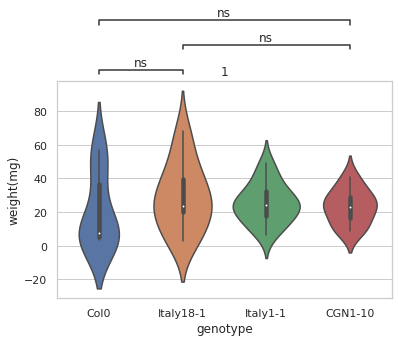

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Col0 v.s. Italy18-1: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-1.147e-01
Italy18-1 v.s. CGN1-10: t-test independent samples with Bonferroni correction, P_val=4.361e-01 stat=-1.507e+00
Col0 v.s. CGN1-10: t-test independent samples with Bonferroni correction, P_val=3.237e-01 stat=-1.673e+00


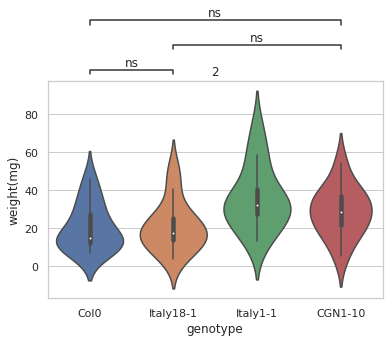

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

Col0 v.s. Italy18-1: t-test independent samples with Bonferroni correction, P_val=3.708e-01 stat=1.699e+00
Italy18-1 v.s. CGN1-10: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-7.638e-01
Col0 v.s. CGN1-10: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=9.097e-01


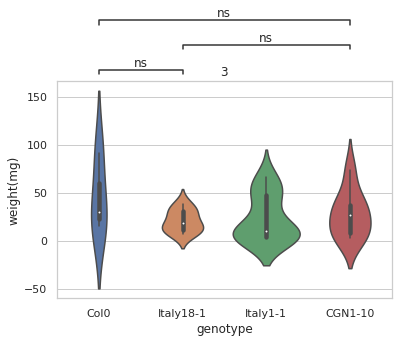

In [16]:
for i in data['iron_condition'].unique():
    plt.figure()
    ax = sns.violinplot(x="genotype", y="weight(mg)", data=data[data['iron_condition'] == i],
                       scale='count')
    ax.set_title(i)
    order = ['Col0','Italy18-1','Italy1-1', 'CGN1-10']
    x = 'genotype'
    y = 'weight(mg)'
    add_stat_annotation(ax, data=data[data['iron_condition'] == i], x=x, y=y, order=order,
                    box_pairs=[('Col0','Italy18-1'), ('Col0','CGN1-10'), ('Italy18-1','CGN1-10')],
                    test='t-test_ind', text_format='star', loc='outside', verbose=2)
    plt.savefig("petri_perlite_iron_condition_weights_per_genotype" + str(i) + '.png')
    plt.show()

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1 v.s. 2: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=3.918e-02
2 v.s. 3: t-test independent samples with Bonferroni correction, P_val=1.790e-01 stat=-2.049e+00
1 v.s. 3: t-test independent samples with Bonferroni correction, P_val=5.969e-01 stat=-1.376e+00


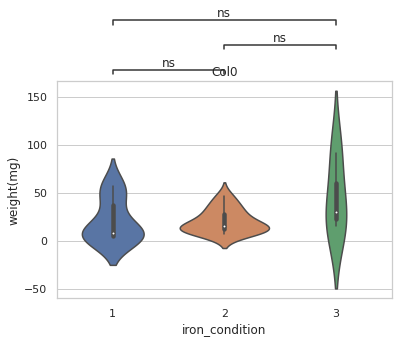

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1 v.s. 2: t-test independent samples with Bonferroni correction, P_val=6.454e-01 stat=1.273e+00
2 v.s. 3: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=7.648e-02
1 v.s. 3: t-test independent samples with Bonferroni correction, P_val=8.068e-01 stat=1.139e+00


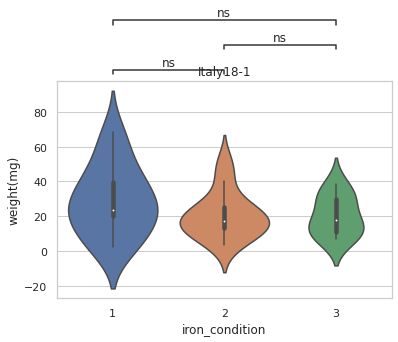

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1 v.s. 2: t-test independent samples with Bonferroni correction, P_val=1.921e-01 stat=-1.934e+00
2 v.s. 3: t-test independent samples with Bonferroni correction, P_val=4.000e-01 stat=1.554e+00
1 v.s. 3: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=3.043e-01


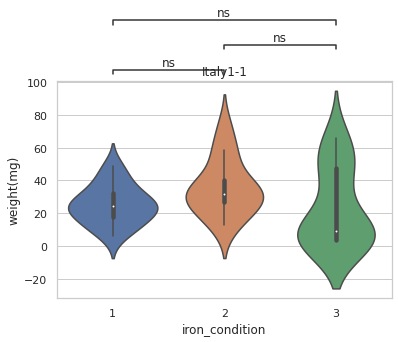

p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

1 v.s. 2: t-test independent samples with Bonferroni correction, P_val=8.029e-01 stat=-1.137e+00
2 v.s. 3: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=1.362e-01
1 v.s. 3: t-test independent samples with Bonferroni correction, P_val=1.000e+00 stat=-5.587e-01


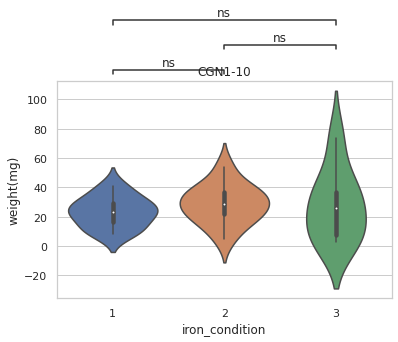

In [16]:
for i in data['genotype'].unique():
    plt.figure()
    ax = sns.violinplot(x="iron_condition", y="weight(mg)", data=data[data['genotype'] == i],
                       scale='count')
    ax.set_title(i)
    order = ['1','2','3']
    x = 'iron_condition'
    y = 'weight(mg)'
    add_stat_annotation(ax, data=data[data['genotype'] == i], x=x, y=y, order=order,
                    box_pairs=[('1','2'), ('1','3'), ('2','3')],
                    test='t-test_ind', text_format='star', loc='outside', verbose=2)
    plt.savefig("perlite_iron_condition_weights_sig" + str(i) + '.png')
    plt.show()



Col0
Italy18-1
Italy1-1
CGN1-10


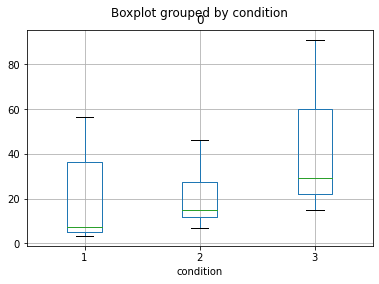

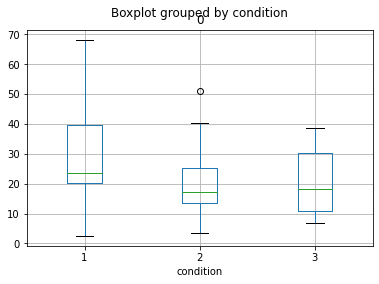

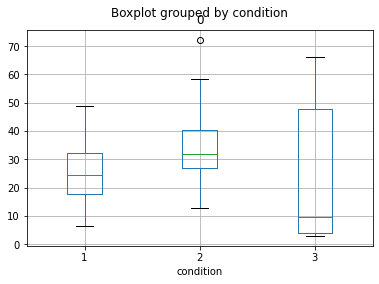

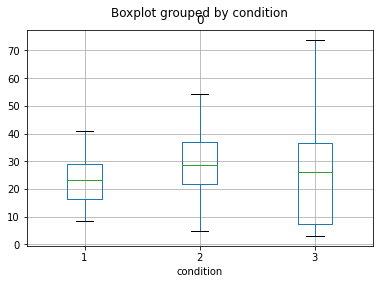

In [128]:
for i in data['genotype'].unique():
    boxplot = data[data['genotype'] == i].boxplot(column=[0], by='condition')
    print(i)